In [1]:
%matplotlib inline
import cv2
import random
import math
import sys
import os
from numpy import array
import numpy as np
from matplotlib import pyplot as plt
from cv2 import imread


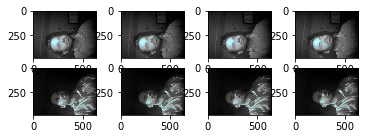

In [2]:
image_1 = cv2.imread('truck_img/425mA.jpg')
image_2 = cv2.imread('truck_img/435mA.jpg')
image_3 = cv2.imread('truck_img/455mA.jpg')
image_4 = cv2.imread('truck_img/475mA.jpg')
image_5 = cv2.imread('truck_img/day_425mA.jpg')
image_6 = cv2.imread('truck_img/day_435mA.jpg')
image_7 = cv2.imread('truck_img/day_455mA.jpg')
image_8 = cv2.imread('truck_img/day_475mA.jpg')

img_arr = [image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8]

for i,image in enumerate(img_arr):
    plt.subplot(4,len(img_arr)/2,i+1)
    plt.imshow(image,cmap='gray')
#     plt.figure()
#     img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     plt.imshow(img_gray,cmap=plt.cm.binary)

## Contrast_Measure function returns 
### 1) The difference in histogram peak difference values of pixels with values < 128 and pixels with pixels with values > 128 .
### 2) The stddev, or the spread of histogram indicating the even-ness or the spread of the histogram

In [5]:
def contrast_measure(arr_image):
    contrast = []
    for image in arr_image:
        if image.ndim ==3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist_contrast = cv2.calcHist([image], [0], None, [256], [0, 256])
        lower_max = np.unravel_index(hist_contrast[:128].argmax(),hist_contrast.shape)[0]
        higher_max = np.unravel_index(hist_contrast[128:].argmax()+128,hist_contrast.shape)[0]
        contrast.append([(higher_max - lower_max),hist_contrast.std()])
    return contrast

### Sharpness_measure function simply returns the laplacian_variance of the entire image. It doesnt work for noisy images. It is a simple derivative based approach for calculation of sharpness of images.

In [6]:
def sharpness_measure(image_arr):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    blur_arr = []
    for image in image_arr:
        blur_arr.append(cv2.Laplacian(image, cv2.CV_64F).var()/(image.shape[0]*image.shape[1])*1000)
    return blur_arr

[[129, 1733.3033], [132, 1727.7565], [136, 1622.2051], [128, 1612.1187], [128, 2646.6514], [129, 2657.9988], [128, 2645.0625], [132, 2896.0789]]
[0.13260395607890357, 0.13225990543486901, 0.13025265744659636, 0.12961840567596394, 0.16236591036893705, 0.15700872236039151, 0.15785882919681837, 0.15839636608400212]


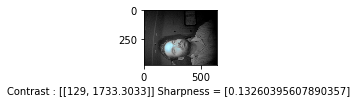

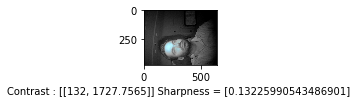

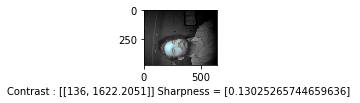

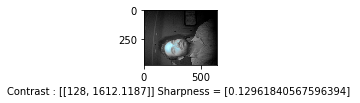

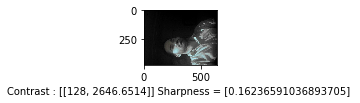

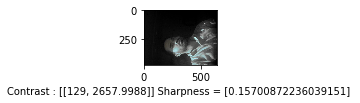

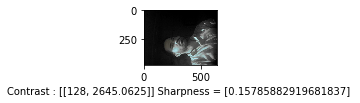

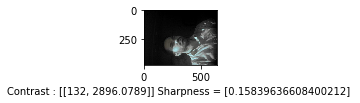

In [7]:
print contrast_measure(img_arr)
print sharpness_measure(img_arr)

# for img in img_arr:
#     print img.size/3

for i,image in enumerate(img_arr):
    plt.figure()
    plt.subplot(3,len(img_arr)/2,i+1)
    plt.xlabel("Contrast : {} Sharpness = {} ".format(contrast_measure([image]),sharpness_measure([image])))
    plt.imshow(image,cmap='gray')
    

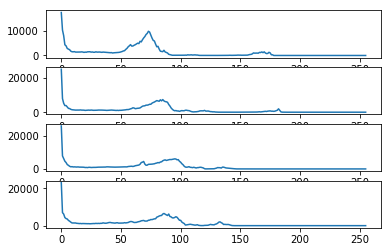

[[130, 2057.8835], [132, 2179.1521]]
[0.56698018006138806, 0.46072558131427671]


In [11]:
hist_gray = cv2.calcHist([image_1], [0], None, [256], [0, 256])
hist_gray_1 = cv2.calcHist([image_2], [0], None, [256], [0, 256])
hist_gray_2 = cv2.calcHist([image_3], [0], None, [256], [0, 256])
hist_gray_3 = cv2.calcHist([image_4], [0], None, [256], [0, 256])


plt.figure()
plt.subplot(411)
plt.plot(hist_gray)
plt.subplot(412)
plt.plot(hist_gray_1)
plt.subplot(413)
plt.plot(hist_gray_2)
plt.subplot(414)
plt.plot(hist_gray_3)
plt.show()

# print gray.shape
# print gray_new.shape


print contrast_measure([image_1,image_2])
print sharpness_measure([image_1,image_2])